a: 3.1085714285714285 b: 0.014285714285714235


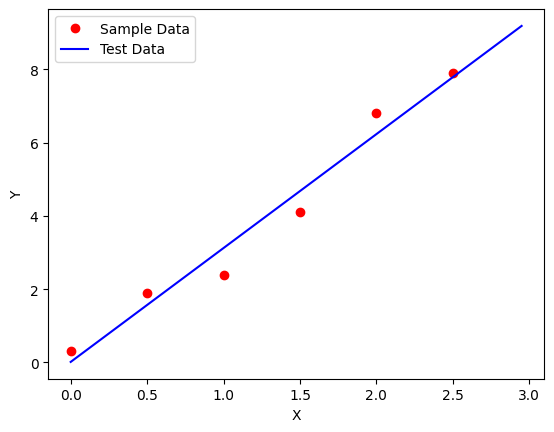

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#입력 샘플 데이터
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.8, 7.9]

#X, Y에 대한 평균 구하기
x_mean = sum(X)/len(X)
y_mean = sum(Y)/len(Y)

#최소제곱법을 이용하여 a, b 계산하기
division = sum((y-y_mean) * (x-x_mean) for y, x in list(zip(Y,X)))
divisor = sum((x-x_mean)**2 for x in X)
a = division/divisor
b = y_mean-a*x_mean

#그래프 그리기 위해 새로운 X값을 입력
new_X = np.arange(0,3,0.05)

#선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = a*new_X+b

print('a:', a, 'b:', b)

#화면에 그래프로 그리기
plt.plot(X,Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-', label = 'Test Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


epoch  W  b  cost
0 [1.170477] [0.25773653] 4.9652624
1 [1.4148344] [0.50209385] 4.0098944
2 [1.5614487] [0.6487082] 3.6659622
3 [1.6494173] [0.7366769] 3.5421467
4 [1.7021985] [0.78945804] 3.4975731
5 [1.7338672] [0.82112676] 3.4815266
6 [1.7528684] [0.840128] 3.4757493
7 [1.7642691] [0.85152876] 3.47367
8 [1.7711095] [0.8583692] 3.4729216
9 [1.7752137] [0.8624734] 3.4726517

=== Test ===
X: 5.0 Y: [9.738542]
X: 2.5 Y: [5.3005075]
a: 3.1085714285714285 b: <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.8624734], dtype=float32)>


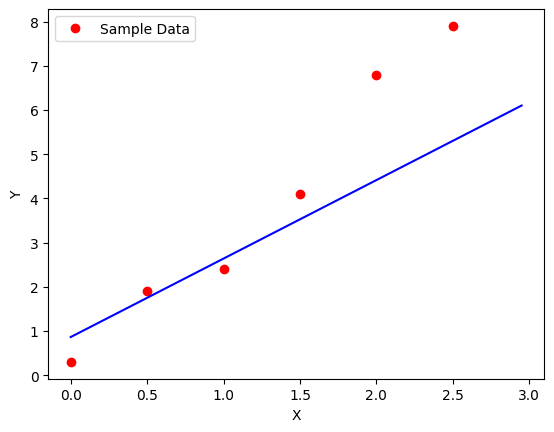

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# X 입력값
# Y X에 대해 예측된 y의 값
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.8, 7.9]

# W, b를 -1.0 ~ 1.0 사이에 균등분포 갖는 Shape 1의 변수형 텐서로 설정
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행
# 학습률은 0.1로 고정
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)

# 비용 함수 계산
@tf.function()
def cost_eval():
  # y = W(가중치) * x + b (bias, 편향)
  # W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용
  hypothesis = W + X + b
  # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산.
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch  W  b  cost")
# 최적화를 10번 수행
for epoch in range(10):

  # 비용을 최소화 하는 것이 최종 목표
  optimizer.minimize(cost_eval, var_list=[W,b])
  # 손실, 가중치, 편향을 출력
  # numpy() 함수는 변수의 배열만 출력
  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())
  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인.

print("\n=== Test ===")
x=5.
print('X:', x, 'Y:', (W * x + b).numpy())
x=2.5
print('X:', x, 'Y:', (W * x + b).numpy())


#그래프 그리기 위해 새로운 X값을 입력
new_X = tf.range(0,3,0.05)

#선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = W*new_X+b

print('a:', a, 'b:', b)

#화면에 그래프로 그리기
plt.plot(X,Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


epoch  W  b  cost
0 [0.503089] [0.832568] 5.1999974
1 [0.60247123] [0.9319502] 4.7170157
2 [0.7006676] [1.0301466] 4.3174033
3 [0.79695415] [1.1264331] 4.000466
4 [0.89043003] [1.2199091] 3.763734
5 [0.9799999] [1.3094789] 3.602476
6 [1.064381] [1.39386] 3.5092716
7 [1.1421523] [1.4716313] 3.4738114
8 [1.2118528] [1.5413318] 3.4831476
9 [1.2721303] [1.6016092] 3.52256

=== Test ===
X: 5.0 Y: [7.9622602]
X: 2.5 Y: [4.7819347]


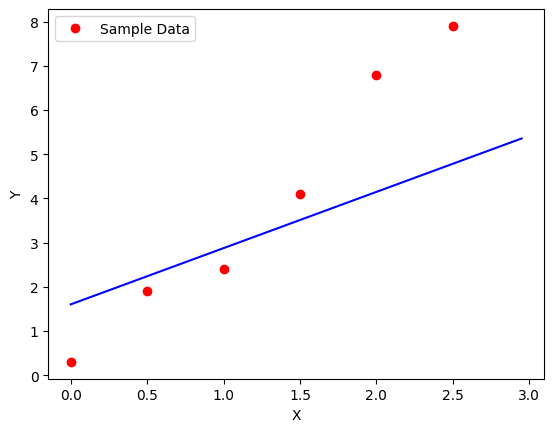

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# X 입력값
# Y X에 대해 예측된 y의 값
X = [0, 0.5, 1.0, 1.5, 2.0, 2.5]
Y = [0.3, 1.9, 2.4, 4.1, 6.8, 7.9]

# W, b를 -1.0 ~ 1.0 사이에 균등분포 갖는 Shape 1의 변수형 텐서로 설정
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random.uniform([1], -1.0, 1.0))

# 텐서플로우에 기본적으로 포함되어 있는 함수를 이용해 경사 하강법 최적화를 수행
# 학습률은 0.1로 고정
#optimizer = tf.optimizers.SGD(learning_rate=0.1)
optimizer =tf.optimizers.Adam(learning_rate=0.1)

# 비용 함수 계산
@tf.function()
def cost_eval():
  # y = W(가중치) * x + b (bias, 편향)
  # W 와 X 가 행렬이 아니므로 tf.matmul 이 아니라 기본 곱셈 기호를 사용
  hypothesis = W + X + b
  # mean(h - Y)^2 : 예측값과 실제값의 거리를 비용(손실) 함수로 계산.
  cost = tf.reduce_mean(tf.square(hypothesis - Y))
  return cost

print("epoch  W  b  cost")
# 최적화를 10번 수행
for epoch in range(10):

  # 비용을 최소화 하는 것이 최종 목표
  optimizer.minimize(cost_eval, var_list=[W,b])
  # 손실, 가중치, 편향을 출력
  # numpy() 함수는 변수의 배열만 출력
  print(epoch, W.numpy(), b.numpy(), cost_eval().numpy())
  # 최적화가 완료된 모델에 테스트 값을 넣고 결과가 잘 나오는지 확인.

print("\n=== Test ===")
x=5.
print('X:', x, 'Y:', (W * x + b).numpy())
x=2.5
print('X:', x, 'Y:', (W * x + b).numpy())


#그래프 그리기 위해 새로운 X값을 입력
new_X = tf.range(0,3,0.05)

#선형 회귀직선을 이용하여 예측 Y값 계산
new_Y = W*new_X+b


#화면에 그래프로 그리기
plt.plot(X,Y, 'ro', label = 'Sample Data')
plt.plot(new_X, new_Y, 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
